In [12]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from subprocess import call
from sklearn.tree import export_graphviz

model = RandomForestClassifier(n_estimators=5)
iris = load_iris()


# Train
model.fit(iris.data, iris.target)

estimator = model.estimators_[2]

# ## Visualize this graph
# # Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# # # Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree2.png', '-Gdpi=600'])






0

Feature ranking:
1. feature 4 (0.620110)
2. feature 1 (0.173920)
3. feature 3 (0.163857)
4. feature 2 (0.042113)


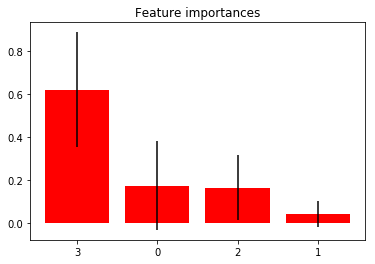

In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=5,random_state=0)
iris = load_iris()

# Train
model.fit(iris.data, iris.target)

# Extract single tree
estimator = model.estimators_[1]


treeSTD = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
totalFeatures = len(iris.data[0])


# Print the feature ranking
print("Feature ranking:")
for f in range(totalFeatures):
    print("%d. feature %d (%f)" % (f + 1, indices[f]+1, importances[indices[f]]))

    

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(totalFeatures), importances[indices],
       color="r", yerr=treeSTD[indices], align="center")
plt.xticks(range(totalFeatures), indices)
plt.show()
